In [19]:
import numpy as np
import os
CurrentPath = os.getcwd()
data_1 = np.loadtxt(CurrentPath + '/2025/data_1.txt', delimiter=' ')
X = data_1.T[0];Y = data_1.T[1]; var = data_1.T[2]

Metropolis-Hastings algorithm: 
1. Propose a prior

In [20]:
# 0 < a < 1, sigma_a = 0.0005
# -2.6 < b < -2.4, sigma_b = 0.1
# 6.7 < c < 6.9, sigma_c = 0.1
# 16 < d < 18 sigma_d = 1
from numpy import random
a_init = random.uniform(0,1)
b_init = random.uniform(-2.6,  -2.4)
c_init = random.uniform(6.7, 6.9)
d_init = random.uniform(16, 18)



2. calculate the likelihood = chisq

In [21]:
def cube(x,a,b,c,d):
    return a*x**3 + b*x**2 + c*x + d

def chisq(x0,y0,var,a,b,c,d):
    diff = (y0 - cube(x0,a,b,c,d))**2
    chisq = np.sum(diff/var)
    return chisq


3. Create a markov chain

In [22]:
from tqdm import tqdm

def Markov(paramk,paramkp1,x,y,var):
    minuschisqk = -chisq(x,y,var,paramk[0],paramk[1],paramk[2],paramk[3])/2
    minuschisqkp1 = -chisq(x,y,var,paramkp1[0],paramkp1[1],paramkp1[2],paramkp1[3])/2
    lnr = np.log(np.random.uniform(0.,1.))

    if minuschisqkp1 - minuschisqk > lnr:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : True")
        return paramkp1, minuschisqkp1
    else:
#        print(f"param0 = {paramk}, paramkp1 = {paramkp1}, \n chisq0 = {minuschisqk}, chisqkp1 = {minuschisqkp1}, lnr = {lnr}, moved : False")
        return paramk, minuschisqk  
# 0 < a < 1, sigma_a = 0.005
# -2.6 < b < -2.4, sigma_b = 0.1
# 6.7 < c < 6.9, sigma_c = 0.1
# 16 < d < 18 sigma_d = 1
def MCMC(paraminit, nstep,normal_vec,x,y,var):
    param0 = paraminit
    arr = np.zeros((len(param0) + 1,nstep))
    for k in tqdm(range(nstep)):
        paramkp1 = np.array([param0[0] + random.normal(0,normal_vec[0]), param0[1]+ random.normal(0,normal_vec[1]),
                              param0[2]+random.normal(0,normal_vec[2]), param0[3]+random.normal(0,normal_vec[3])]) # step size
        param0, loglikelihood = Markov(param0, paramkp1,x,y,var) #loglikelihood = -chisq
        col = np.hstack((param0, loglikelihood))
        arr[:,k] = col
    return arr


In [27]:
paraminit = np.array([a_init, b_init, c_init, d_init])
nstep = int(1e7)
normal_vec = np.array([0.05, 0.1, 2, 4])
mcmcarr = MCMC(paraminit, nstep,normal_vec,X,Y,var)
bestfitind = mcmcarr[4].argmax()
bestfitparm = [mcmcarr[0][bestfitind], mcmcarr[1][bestfitind], mcmcarr[2][bestfitind], mcmcarr[3][bestfitind]]
bestfitval = mcmcarr[4][bestfitind]
print(f"bestfitparm = {bestfitparm}, bestfitval = {bestfitval}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [03:50<00:00, 43382.73it/s]

bestfitparm = [0.7499695947822987, -2.495187978136055, 6.505508598082375, 22.56674028481811], bestfitval = -293.4933828803437


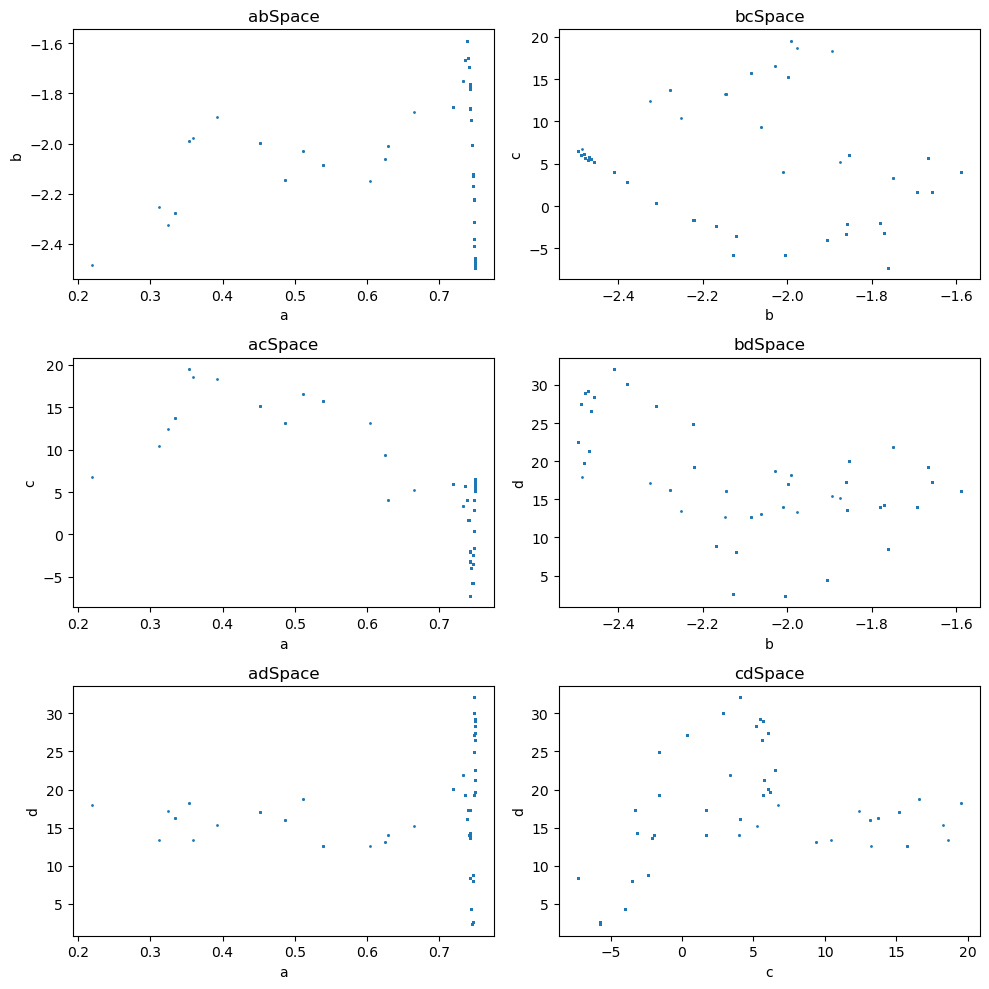

In [30]:
# 1. mcmcarr analysis
abSpace = mcmcarr[0:2,:]
acSpace = mcmcarr[[0,2],:]
adSpace = mcmcarr[[0,3],:]
bcSpace = mcmcarr[[1,2],:]
bdSpace = mcmcarr[[1,3],:]
cdSpace = mcmcarr[[2,3],:]


# scatter plot for every space in mcmcarr
import matplotlib.pyplot as plt

# 2D 히스토그램 생성
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].scatter(abSpace[0], abSpace[1], s=1)
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('abSpace')

ax[1,0].scatter(acSpace[0], acSpace[1], s=1)
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('c')
ax[1,0].set_title('acSpace')

ax[2,0].scatter(adSpace[0], adSpace[1], s=1)
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('d')
ax[2,0].set_title('adSpace')

ax[0,1].scatter(bcSpace[0], bcSpace[1], s=1)
ax[0,1].set_xlabel('b')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('bcSpace')

ax[1,1].scatter(bdSpace[0], bdSpace[1], s=1)
ax[1,1].set_xlabel('b')
ax[1,1].set_ylabel('d')
ax[1,1].set_title('bdSpace')

ax[2,1].scatter(cdSpace[0], cdSpace[1], s=1)
ax[2,1].set_xlabel('c')
ax[2,1].set_ylabel('d')
ax[2,1].set_title('cdSpace')

plt.tight_layout()
plt.show()

In [ ]:
abMean = np.sum(abSpace, axis = 1)/nstep
abCov = np.cov(abSpace)
acMean = np.sum(acSpace, axis = 1)/nstep
acCov = np.cov(acSpace)
adMean = np.sum(adSpace, axis = 1)/nstep
adCov = np.cov(adSpace)
bcMean = np.sum(bcSpace, axis = 1)/nstep
bcCov = np.cov(bcSpace)
bdMean = np.sum(bdSpace, axis = 1)/nstep
bdCov = np.cov(bdSpace)
cdMean = np.sum(cdSpace, axis = 1)/nstep
cdCov = np.cov(cdSpace)
print(f"abMean = {abMean}, abCov = {abCov}")
print(f"acMean = {acMean}, acCov = {acCov}")
print(f"adMean = {adMean}, adCov = {adCov}")
print(f"bcMean = {bcMean}, bcCov = {bcCov}")
print(f"bdMean = {bdMean}, bdCov = {bdCov}")
print(f"cdMean = {cdMean}, cdCov = {cdCov}")

abMean = [ 0.74985376 -2.4783617 ], abCov = [[ 3.02209376e-07 -3.96794690e-06]
 [-3.96794690e-06  4.53399001e-04]]
acMean = [0.74985376 5.95734122], acCov = [[3.02209376e-07 8.34674529e-05]
 [8.34674529e-05 3.50504514e-01]]
adMean = [ 0.74985376 23.42980526], adCov = [[3.02209376e-07 1.69627229e-05]
 [1.69627229e-05 1.27596839e+01]]
bcMean = [-2.4783617   5.95734122], bcCov = [[ 0.0004534  -0.01178263]
 [-0.01178263  0.35050451]]
bdMean = [-2.4783617  23.42980526], bdCov = [[4.53399001e-04 5.30837545e-03]
 [5.30837545e-03 1.27596839e+01]]
cdMean = [ 5.95734122 23.42980526], cdCov = [[ 0.35050451 -0.65066044]
 [-0.65066044 12.75968395]]
0.0005497357056538939 0.0005497357331421268


Run 2nd MCMC with 1st MCMC chain as a starting point

In [40]:
nstep2 = int(1e7)
normal_vec2 = np.array([np.sqrt(np.cov(mcmcarr[0])), np.sqrt(np.cov(mcmcarr[1])), np.sqrt(np.cov(mcmcarr[2])), np.sqrt(np.cov(mcmcarr[3]))])
print(f"normal_vec2 = {normal_vec2}")
mcmcarr2 = MCMC(bestfitparm, nstep2,normal_vec2,X,Y,var)
bestfitind2 = mcmcarr2[4].argmax()
bestfitparm2 = [mcmcarr2[0][bestfitind2], mcmcarr2[1][bestfitind2], mcmcarr2[2][bestfitind2], mcmcarr2[3][bestfitind2]]
bestfitval2 = mcmcarr2[4][bestfitind2]
print(f"bestfitparm2 = {bestfitparm2}, bestfitval2 = {bestfitval2}")

normal_vec2 = [5.49735733e-04 2.12931679e-02 5.92034217e-01 3.57206998e+00]


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 10000000/10000000 [03:47<00:00, 43931.37it/s]

bestfitparm2 = [0.7500136031809839, -2.501877172375556, 6.862132441353047, 16.774967603364487], bestfitval2 = -4.7392815284993866


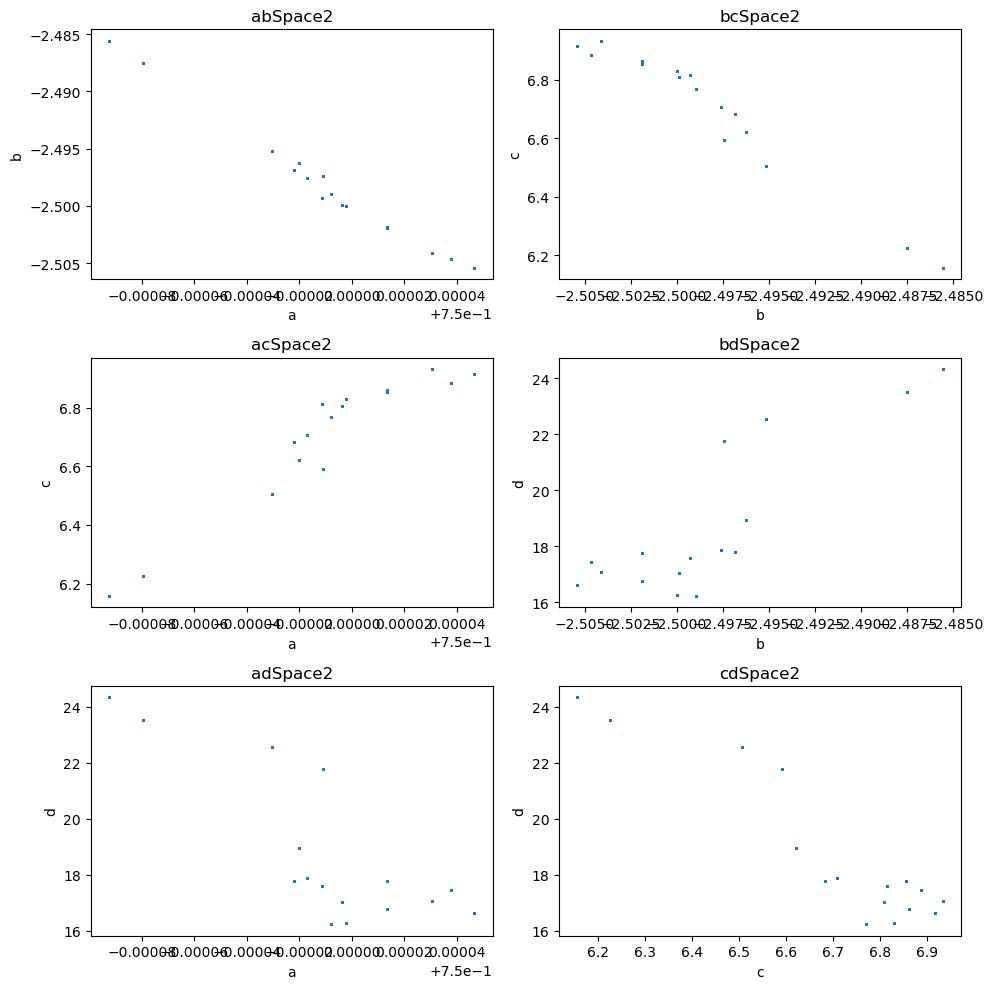

In [41]:
# mcmcarr2 analysis
abSpace2 = mcmcarr2[0:2,:]
acSpace2 = mcmcarr2[[0,2],:]
adSpace2 = mcmcarr2[[0,3],:]
bcSpace2 = mcmcarr2[[1,2],:]
bdSpace2 = mcmcarr2[[1,3],:]
cdSpace2 = mcmcarr2[[2,3],:]


fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].scatter(abSpace2[0], abSpace2[1], s=1)
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('abSpace2')

ax[1,0].scatter(acSpace2[0], acSpace2[1], s=1)
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('c')
ax[1,0].set_title('acSpace2')

ax[2,0].scatter(adSpace2[0], adSpace2[1], s=1)
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('d')
ax[2,0].set_title('adSpace2')

ax[0,1].scatter(bcSpace2[0], bcSpace2[1], s=1)
ax[0,1].set_xlabel('b')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('bcSpace2')

ax[1,1].scatter(bdSpace2[0], bdSpace2[1], s=1)
ax[1,1].set_xlabel('b')
ax[1,1].set_ylabel('d')
ax[1,1].set_title('bdSpace2')

ax[2,1].scatter(cdSpace2[0], cdSpace2[1], s=1)
ax[2,1].set_xlabel('c')
ax[2,1].set_ylabel('d')
ax[2,1].set_title('cdSpace2')

plt.tight_layout()
plt.show()

In [44]:
aStd = np.sqrt(np.cov(mcmcarr2[0]))
bStd = np.sqrt(np.cov(mcmcarr2[1]))
cStd = np.sqrt(np.cov(mcmcarr2[2]))
dStd = np.sqrt(np.cov(mcmcarr2[3]))
print(f"aStd = {aStd}, bStd = {bStd}, cStd = {cStd}, dStd = {dStd}")

aStd = 1.2467347701461154e-05, bStd = 0.0018369342627407605, cStd = 0.07252867147328525, dStd = 0.6497757840858742


In [45]:
# 3rd mcmc chain
nstep3 = int(1e7 + 5*1e6)
normal_vec3 = np.array([aStd, bStd, cStd, dStd])
mcmcarr3 = MCMC(bestfitparm2, nstep3,normal_vec3,X,Y,var)
bestfitind3  = mcmcarr3[4].argmax()
bestfitparm3 = [mcmcarr3[0][bestfitind3], mcmcarr3[1][bestfitind3], mcmcarr3[2][bestfitind3], mcmcarr3[3][bestfitind3]]
bestfitval3 = mcmcarr3[4][bestfitind3]
print(f"bestfitparm3 = {bestfitparm3}, bestfitval3 = {bestfitval3}")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15000000/15000000 [05:42<00:00, 43831.99it/s]

bestfitparm3 = [0.7499996364811466, -2.4999163186673483, 6.794928355328786, 17.070980854566862], bestfitval3 = -1.646923579487578


In [46]:
# 1. mcmcarr analysis
abSpace3 = mcmcarr3[0:2,:]
acSpace3 = mcmcarr3[[0,2],:]
adSpace3 = mcmcarr3[[0,3],:]
bcSpace3 = mcmcarr3[[1,2],:]
bdSpace3 = mcmcarr3[[1,3],:]
cdSpace3 = mcmcarr3[[2,3],:]

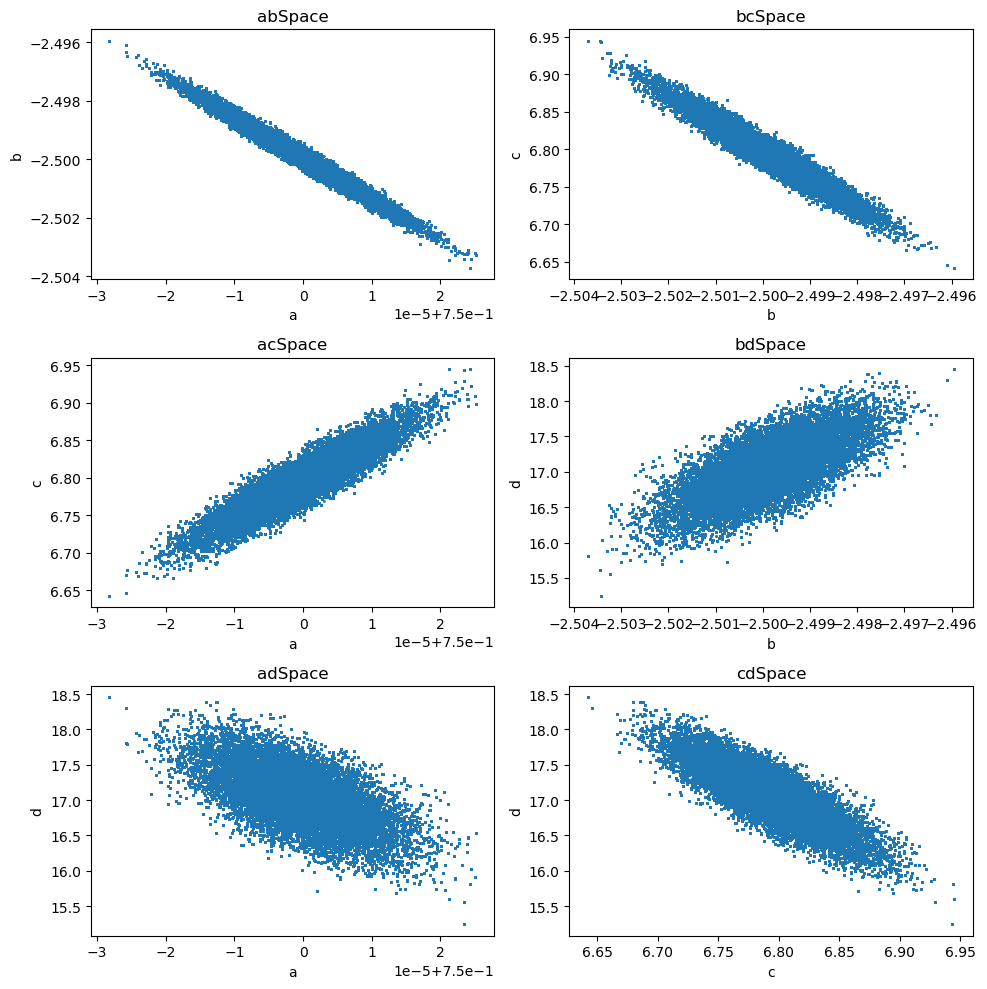

In [47]:
# 2D 히스토그램 생성
fig, ax = plt.subplots(3,2, figsize=(10,10))
ax[0,0].scatter(abSpace3[0], abSpace3[1], s=1)
ax[0,0].set_xlabel('a')
ax[0,0].set_ylabel('b')
ax[0,0].set_title('abSpace')

ax[1,0].scatter(acSpace3[0], acSpace3[1], s=1)
ax[1,0].set_xlabel('a')
ax[1,0].set_ylabel('c')
ax[1,0].set_title('acSpace')

ax[2,0].scatter(adSpace3[0], adSpace3[1], s=1)
ax[2,0].set_xlabel('a')
ax[2,0].set_ylabel('d')
ax[2,0].set_title('adSpace')

ax[0,1].scatter(bcSpace3[0], bcSpace3[1], s=1)
ax[0,1].set_xlabel('b')
ax[0,1].set_ylabel('c')
ax[0,1].set_title('bcSpace')

ax[1,1].scatter(bdSpace3[0], bdSpace3[1], s=1)
ax[1,1].set_xlabel('b')
ax[1,1].set_ylabel('d')
ax[1,1].set_title('bdSpace')

ax[2,1].scatter(cdSpace3[0], cdSpace3[1], s=1)
ax[2,1].set_xlabel('c')
ax[2,1].set_ylabel('d')
ax[2,1].set_title('cdSpace')

plt.tight_layout()
plt.show()

MCMC analysis

We'll draw two kinds of ellipse with two different methods:
1. using covariance matrix
2. counting all the points and create 68%, 95%, 99% interval from cdf

  
1) Using covariance matrix
the analytical function of the ellipse is from this link:   
 https://cookierobotics.com/007/


TypeError: Input z must be 2D, not 1D

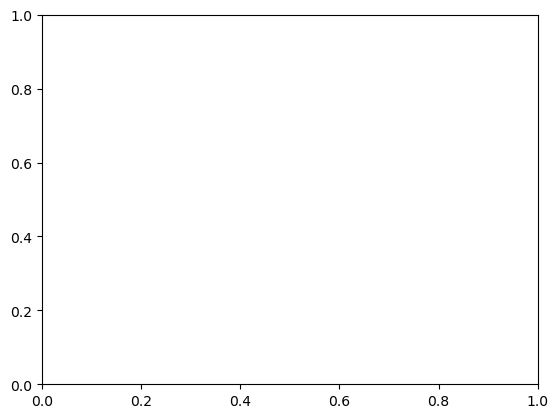

In [48]:
# contour in bcSpace3
bcCov = np.cov(bcSpace3)
def ellipse(x,y,cov):
    a,b = cov[0,0], cov[0,1]
    c,d = cov[1,0], cov[1,1]
    lamb1 = (a+c)/2 + np.sqrt(((a-c)/2)**2 + b**2)
    lamb2 = (a+c)/2 - np.sqrt(((a-c)/2)**2 + b**2)
    theta = np.arctan(2*(lamb1-a))





